In [2]:
import numpy as np

In [3]:
input_data = np.array([2,3])

weights = {
    'node_0': np.array([1,1]),
    'node_1': np.array([-1,1]),
    'output': np.array([2,-1])
}

In [5]:
# calculate the hidded node values 

node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

In [6]:
# get the hidden layer array

hidden_layer_array = np.array([node_0_value, node_1_value])

output_value = (hidden_layer_array * weights['output']).sum()
output_value

9

In [7]:
def relu(number):
    return max(0, number)

In [8]:
print(relu(-100))
print(relu(100))

0
100


In [10]:
for weight in weights:
    print(weight)

node_0
node_1
output


In [33]:
def calculate_weights(input_data_row, weights):

    weights_count = len(weights)

    sum_weights = []

    for data in input_data_row:
        hidden_layer_values = []
        counter=1
        for weight in weights:
            if counter < weights_count:
                weighted_sum = (data * weights[weight]).sum()
                relu_value = relu(weighted_sum)
                hidden_layer_values.append(relu_value)
                counter+=1
            else:
                break
        weighted_sum = (np.array(hidden_layer_values) * weights['output']).sum()
        sum_weights.append(relu(weighted_sum))

    print(sum_weights)
        

In [39]:
input_data_row = np.array([[3,5], [0,0], [8,4]])

weights = {
    'node_0': np.array([2,4]),
    'node_1': np.array([4,-5]),
    'output': np.array([2,7])
}

calculate_weights(input_data_row, weights)

[52, 0, 148]


In [36]:
input_data_row = np.array([[2,3]])

weights = {
    'node_0': np.array([1,1]),
    'node_1': np.array([-1,1]),
    'output': np.array([2,-1])
}

calculate_weights(input_data_row, weights)

[9]


In [40]:
input_data_row = np.array([[3,5]])

weights = {
    'node_0': np.array([2,4]),
    'node_1': np.array([4,-5]),
    'output': np.array([2,7])
}

calculate_weights(input_data_row, weights)

[52]


Gradient Descent and Back Propogation

In [51]:
weights = np.array([1,2])
input_data = np.array([3,4])

target = 6
learning_rate = 0.01


In [52]:
# function to get the slope 

def get_slope(input_data, target, weights):
    preds = (weights*input_data).sum()
    error = preds - target
    slope = 2*input_data*error
    return slope

In [53]:
# function to get mse

def get_mse(input_data, target, weights):
    preds = (weights*input_data).sum()
    error = preds - target
    sse = (error**2).sum()
    mse = sse/len(input_data)
    return mse

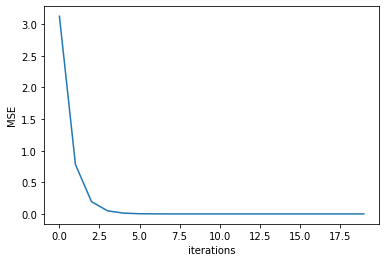

In [54]:
n_update = 20
mse_hist=[]

# iterate over the number of updates
for i in range(n_update):
    slope = get_slope(input_data, target, weights)
    weights = weights - 0.01 * slope
    mse = get_mse(input_data, target, weights)
    mse_hist.append(mse)
    
# plot mse history 
import matplotlib.pyplot as plt

plt.plot(mse_hist)
plt.xlabel('iterations')
plt.ylabel('MSE')

plt.show()